Final Project - Churn Part A

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn = pd.read_csv(r'C:\Users\emmag\Python\Final Project\churn.csv')

In [4]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
pd.set_option('display.max_rows', 7050)
pd.set_option('display.max_columns', 25)
churn = churn.rename(columns=str.lower)
churn.shape

(7043, 21)

In [6]:
churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
from sklearn import preprocessing

label_encoder_contract = preprocessing.LabelEncoder()
label_encoder_internetservice = preprocessing.LabelEncoder()
label_encoder_paymentmethod = preprocessing.LabelEncoder()

churn['contract_code'] = label_encoder_contract.fit_transform(churn['contract'])
contract_mapping = {index: label for index, label in enumerate(label_encoder_contract.classes_)}

churn['internetservice_code'] = label_encoder_internetservice.fit_transform(churn['internetservice'])
internetservice_mapping = {index: label for index, label in enumerate(label_encoder_internetservice.classes_)}

churn['paymentmethod_code'] = label_encoder_paymentmethod.fit_transform(churn['paymentmethod'])
paymentmethod_mapping = {index: label for index, label in enumerate(label_encoder_paymentmethod.classes_)}

churn['totalcharges'] = pd.to_numeric(churn['totalcharges'], errors='coerce')

def convert_yes_no_to_int(df, column_name):
    df.loc[df[column_name] == 'No', column_name] = 0
    df.loc[df[column_name] == 'Yes', column_name] = 1

    df.loc[~df[column_name].isin([0, 1]), column_name] = 0  
    df[column_name] = df[column_name].astype('int64')

columns_to_convert = [
    'partner', 'dependents', 'phoneservice', 'multiplelines',
    'onlinesecurity','onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'paperlessbilling', 'churn'
]

for column in columns_to_convert:
    convert_yes_no_to_int(churn, column)

churn.loc[churn.gender == 'Male', 'gender'] = 0
churn.loc[churn.gender == 'Female', 'gender'] = 1
churn = churn.astype({"gender": 'int64'})

churn = churn.drop(['contract','internetservice','paymentmethod'], axis=1)


churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,contract_code,internetservice_code,paymentmethod_code
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,2
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,3
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,3
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,2


In [8]:
amnt_of_cust = len(churn)
still_our_cust = len(churn) - sum(churn['churn'])

print("We have %d all-time customers, but only %d of them did not churn (%f%%)" % (amnt_of_cust, still_our_cust, (still_our_cust/amnt_of_cust*100)))

We have 7043 all-time customers, but only 5174 of them did not churn (73.463013%)


In [9]:
churn.isna().sum()

customerid               0
gender                   0
seniorcitizen            0
partner                  0
dependents               0
tenure                   0
phoneservice             0
multiplelines            0
onlinesecurity           0
onlinebackup             0
deviceprotection         0
techsupport              0
streamingtv              0
streamingmovies          0
paperlessbilling         0
monthlycharges           0
totalcharges            11
churn                    0
contract_code            0
internetservice_code     0
paymentmethod_code       0
dtype: int64

In [10]:
mean_totalcharges = churn['totalcharges'].mean()
churn['totalcharges'] = churn['totalcharges'].fillna(mean_totalcharges)
churn.isna().sum()

customerid              0
gender                  0
seniorcitizen           0
partner                 0
dependents              0
tenure                  0
phoneservice            0
multiplelines           0
onlinesecurity          0
onlinebackup            0
deviceprotection        0
techsupport             0
streamingtv             0
streamingmovies         0
paperlessbilling        0
monthlycharges          0
totalcharges            0
churn                   0
contract_code           0
internetservice_code    0
paymentmethod_code      0
dtype: int64

<Axes: >

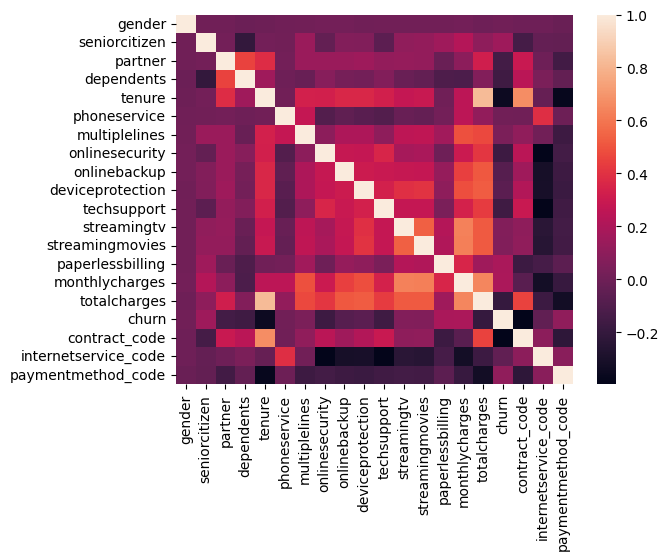

In [11]:
numeric_churn = churn.select_dtypes(include=['number', 'bool'])
sns.heatmap(numeric_churn.corr())

<Axes: >

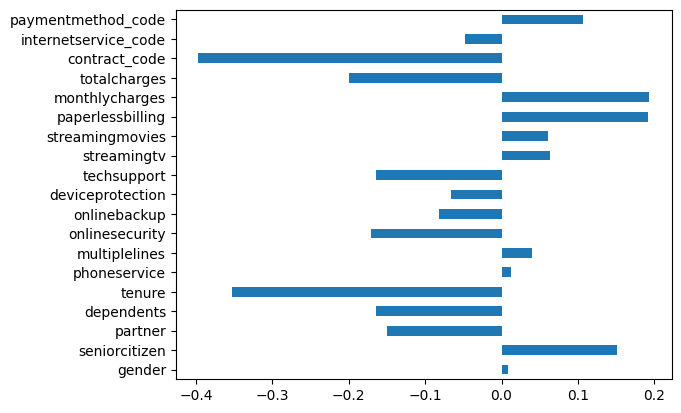

In [12]:
numeric_churn.corr().churn.drop('churn').plot(kind='barh')

Text(0.5, 1.0, 'Monthly Charges per customers')

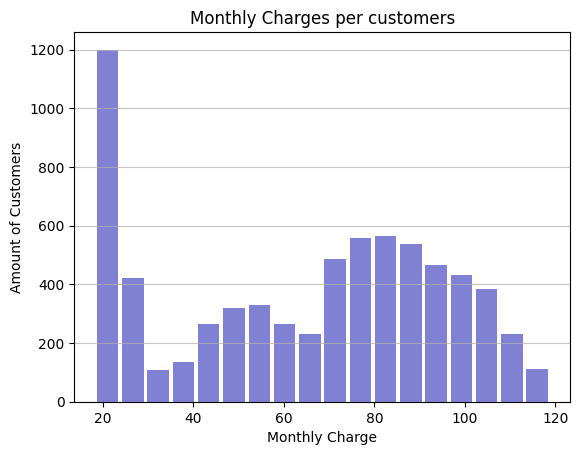

In [13]:
plt.hist(x=churn['monthlycharges'], bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Monthly Charge')
plt.ylabel('Amount of Customers')
plt.title('Monthly Charges per customers')

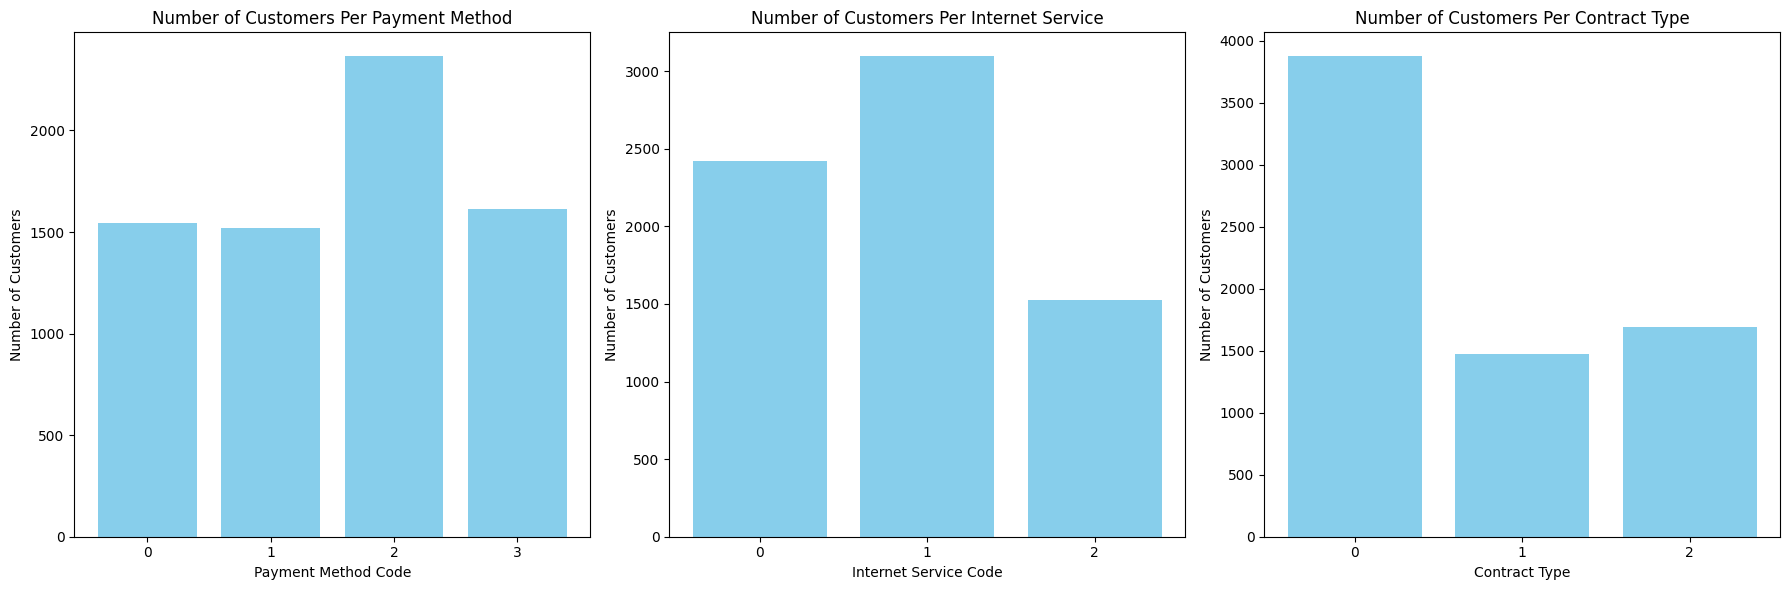

In [14]:
payment_method_counts = churn['paymentmethod_code'].value_counts()
internet_service_counts = churn['internetservice_code'].value_counts()
contract_type_counts = churn['contract_code'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


axes[0].bar(payment_method_counts.index, payment_method_counts.values, color='skyblue')
axes[0].set_xlabel('Payment Method Code')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Number of Customers Per Payment Method')
axes[0].set_xticks(payment_method_counts.index)
axes[0].set_xticklabels(payment_method_counts.index.astype(int))


axes[1].bar(internet_service_counts.index, internet_service_counts.values, color='skyblue')
axes[1].set_xlabel('Internet Service Code')
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Number of Customers Per Internet Service')
axes[1].set_xticks(internet_service_counts.index)
axes[1].set_xticklabels(internet_service_counts.index.astype(int))


axes[2].bar(contract_type_counts.index, contract_type_counts.values, color='skyblue')
axes[2].set_xlabel('Contract Type')
axes[2].set_ylabel('Number of Customers')
axes[2].set_title('Number of Customers Per Contract Type')
axes[2].set_xticks(contract_type_counts.index)
axes[2].set_xticklabels(contract_type_counts.index.astype(int))

plt.tight_layout()
plt.show()

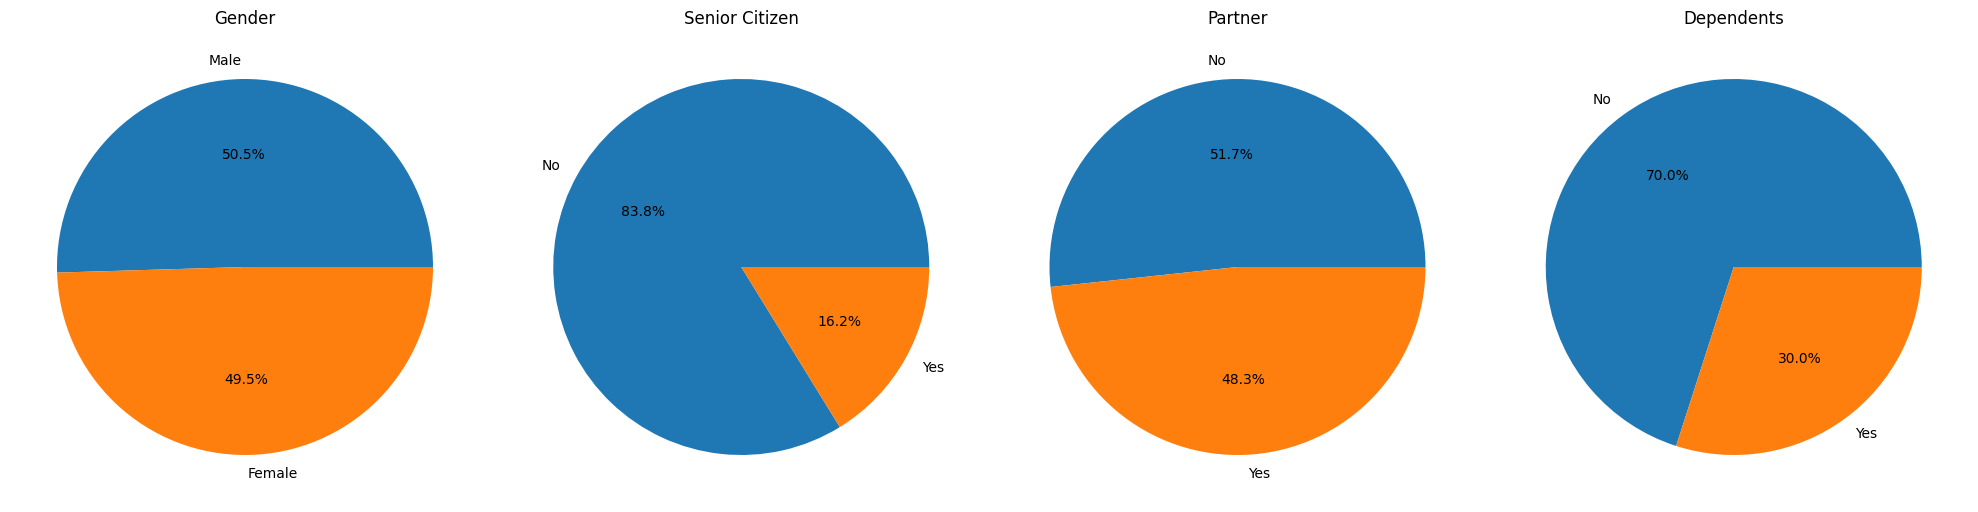

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

gender_pie = churn['gender'].value_counts()
label_gender = ["Male", "Female"]
axs[0].pie(gender_pie, labels=label_gender, autopct='%1.1f%%')
axs[0].set_title('Gender')

seniorcitizen_pie = churn['seniorcitizen'].value_counts()
label_seniorcitizen = ["No", "Yes"]
axs[1].pie(seniorcitizen_pie, labels=label_seniorcitizen, autopct='%1.1f%%')
axs[1].set_title('Senior Citizen')

partner_pie = churn['partner'].value_counts()
label_partner = ["No", "Yes"]
axs[2].pie(partner_pie, labels=label_partner, autopct='%1.1f%%')
axs[2].set_title('Partner')

dependents_pie = churn['dependents'].value_counts()
label_dependents = ["No", "Yes"]
axs[3].pie(dependents_pie, labels=label_dependents, autopct='%1.1f%%')
axs[3].set_title('Dependents')

plt.tight_layout()
plt.show()

In [16]:
churn['customerid'] = churn['customerid'].astype(str)
churn['customerid'] = churn['customerid'].str.strip()
churn['customerid'] = churn['customerid'].replace('[^0-9]', '', regex=True)
churn['customerid'] = pd.to_numeric(churn['customerid'], errors='coerce')
churn['customerid'] = churn['customerid'].astype(int)

churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,contract_code,internetservice_code,paymentmethod_code
0,7590,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,2
1,5575,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,3
2,3668,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,3
3,7795,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0
4,9237,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,2


In [17]:
churn_dummy = pd.get_dummies(churn)
churn_dummy.corr()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,contract_code,internetservice_code,paymentmethod_code
customerid,1.000000,-0.006073,-0.002197,-0.026779,-0.012816,0.007805,-0.006252,0.002320,0.015240,-0.000518,-0.003976,0.003755,-0.004748,-0.012737,-0.001904,-0.003995,-0.000456,-0.017385,0.014765,-0.012230,0.011835
gender,-0.006073,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,0.011754,0.014569,-0.000048,0.008612,-0.000126,0.000863,-0.017352
seniorcitizen,-0.002197,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102395,0.150889,-0.142554,-0.032310,-0.038551
partner,-0.026779,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.318812,-0.150448,0.294806,0.000891,-0.154798
dependents,-0.012816,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.064535,-0.164221,0.243187,0.044590,-0.040292
tenure,0.007805,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.824757,-0.352229,0.671607,-0.030359,-0.370436
phoneservice,-0.006252,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.112851,0.011942,0.002247,0.387436,-0.004184
multiplelines,0.002320,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468689,0.040102,0.107114,0.011124,-0.171026
onlinesecurity,0.015240,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412245,-0.171226,0.245530,-0.393013,-0.150100
onlinebackup,-0.000518,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509692,-0.082255,0.155085,-0.314737,-0.170898


In [18]:
churn_dummy = churn_dummy.astype(float)
churn_dummy.dtypes

customerid              float64
gender                  float64
seniorcitizen           float64
partner                 float64
dependents              float64
tenure                  float64
phoneservice            float64
multiplelines           float64
onlinesecurity          float64
onlinebackup            float64
deviceprotection        float64
techsupport             float64
streamingtv             float64
streamingmovies         float64
paperlessbilling        float64
monthlycharges          float64
totalcharges            float64
churn                   float64
contract_code           float64
internetservice_code    float64
paymentmethod_code      float64
dtype: object

ML Algorithms

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(churn_dummy, test_size=1410, random_state=0, shuffle=True)

In [20]:
label = 'churn'
customer = 'customerid'

x_train = train.drop(label, axis = 1)
x_train = x_train.drop(customer, axis = 1)
y_train = train[label]
customer_train = train[customer]

x_test = test.drop(label, axis = 1)
x_test = x_test.drop(customer, axis = 1)
y_test = test[label]
customer_test = test[customer]

Decision Tree - three depth options

for loop for checking what are the best depths for us to show

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_depth = 0
best_accuracy = 0

results = pd.DataFrame(columns=['Depth', 'Accuracy'])

for depth in range(1, 101):
    depth_decision = DecisionTreeClassifier(max_depth=depth)
    depth_decision.fit(x_train, y_train)

    y_test_pred = depth_decision.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    new_row = pd.DataFrame({'Depth': [depth], 'Accuracy': [accuracy]})
    results = pd.concat([results, new_row], ignore_index=True)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"The best depth is {best_depth} with an accuracy of {best_accuracy:.4f}")

C:\Users\emmag\AppData\Local\Temp\ipykernel_38164\1594651551.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


The best depth is 3 with an accuracy of 0.7738


In [22]:
final_decision_tree = DecisionTreeClassifier(max_depth=best_depth)
final_decision_tree.fit(x_train, y_train)

y_test_pred_final = final_decision_tree.predict(x_test)

output_final = pd.DataFrame({
    'customerid': customer_test, 
    'actually_churned': y_test, 
    'churned_predicted_by_model': y_test_pred_final
})

output_final

,customerid,actually_churned,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,1.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
4446,6161.0,1.0,1.0
2234,4500.0,0.0,0.0
5454,2506.0,1.0,1.0
1278,4730.0,0.0,0.0
578,6522.0,0.0,0.0


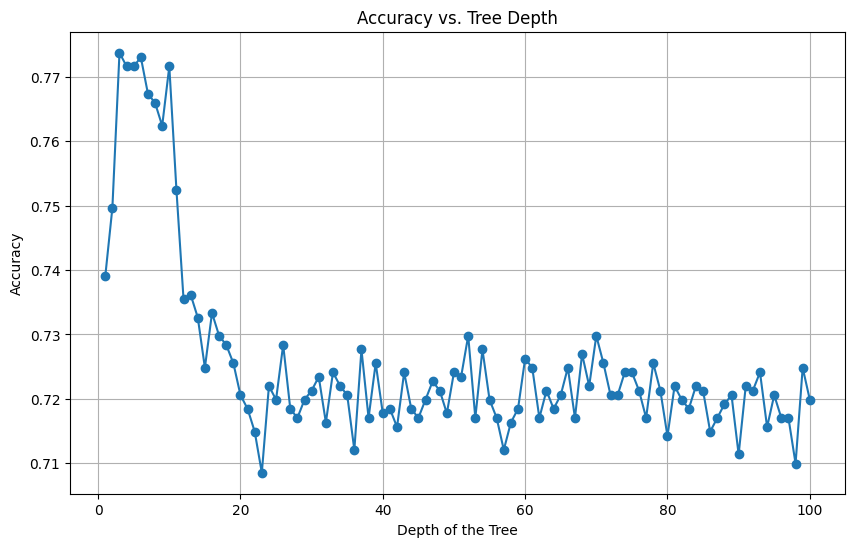

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(results['Depth'], results['Accuracy'], marker='o', linestyle='-')
plt.title('Accuracy vs. Tree Depth')
plt.xlabel('Depth of the Tree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

First depth - 6 max depth 

In [24]:
depth_decision1 = DecisionTreeClassifier(max_depth=6)
depth_decision1.fit(x_train, y_train) 

y_test_pred_decision_tree1 = depth_decision1.predict(x_test) 

output_depth_decision1 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_decision_tree1})
output_depth_decision1

,customerid,actually_churned,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
4446,6161.0,1.0,1.0
2234,4500.0,0.0,0.0
5454,2506.0,1.0,1.0
1278,4730.0,0.0,0.0
578,6522.0,0.0,0.0


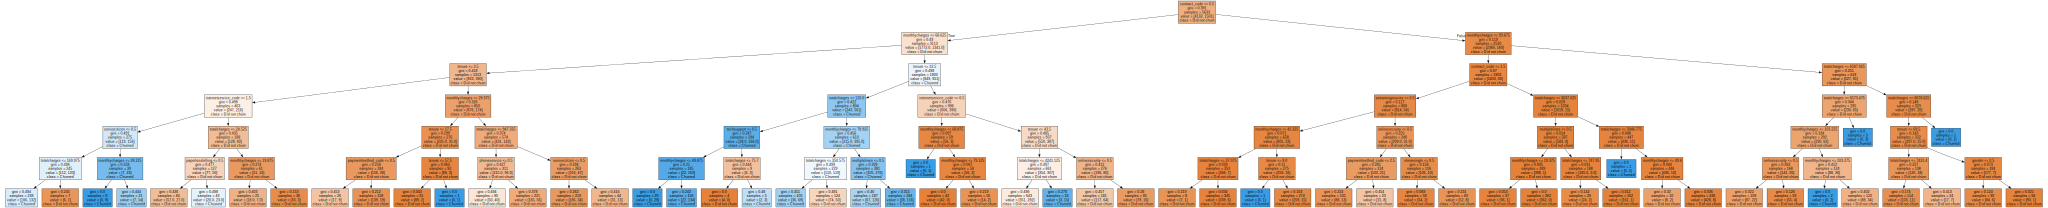

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source

def plot_tree(tree, features, labels, filename=None):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled=True))
    display(SVG(graph.pipe(format='svg')))
    
    if filename:
        graph.render(filename, format='png', cleanup=True)

plot_tree(depth_decision1, x_train.columns, ['Did not churn', 'Churned'], 'depth_decision1')

In [26]:
test_decision_tree1 = accuracy_score(y_test, y_test_pred_decision_tree1)
test_decision_tree1

0.7730496453900709

Second depth - 3 max depth

In [27]:
depth_decision2 = DecisionTreeClassifier(max_depth=3)
depth_decision2.fit(x_train, y_train) 

y_test_pred_decision_tree2 = depth_decision2.predict(x_test) 

output_depth_decision2 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_decision_tree2})
output_depth_decision2

,customerid,actually_churned,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,1.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
4446,6161.0,1.0,1.0
2234,4500.0,0.0,0.0
5454,2506.0,1.0,1.0
1278,4730.0,0.0,0.0
578,6522.0,0.0,0.0


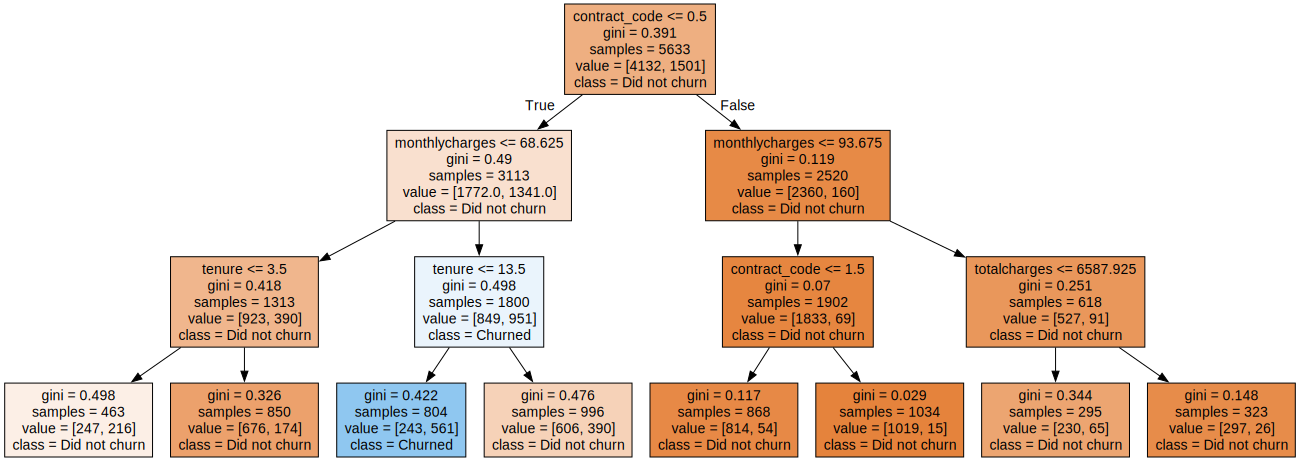

In [28]:
def plot_tree(tree, features, labels, filename=None):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled=True))
    display(SVG(graph.pipe(format='svg')))
    
    if filename:
        graph.render(filename, format='png', cleanup=True)

plot_tree(depth_decision2, x_train.columns, ['Did not churn', 'Churned'], 'depth_decision2')

In [29]:
test_decision_tree2 = accuracy_score(y_test, y_test_pred_decision_tree2)
test_decision_tree2

0.7737588652482269

Third depth - 5 max depth

In [30]:
depth_decision3 = DecisionTreeClassifier(max_depth=5)
depth_decision3.fit(x_train, y_train) 

y_test_pred_decision_tree3 = depth_decision3.predict(x_test) 

output_depth_decision3 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_decision_tree3})
output_depth_decision3

,customerid,actually_churned,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,1.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
4446,6161.0,1.0,1.0
2234,4500.0,0.0,0.0
5454,2506.0,1.0,1.0
1278,4730.0,0.0,0.0
578,6522.0,0.0,0.0


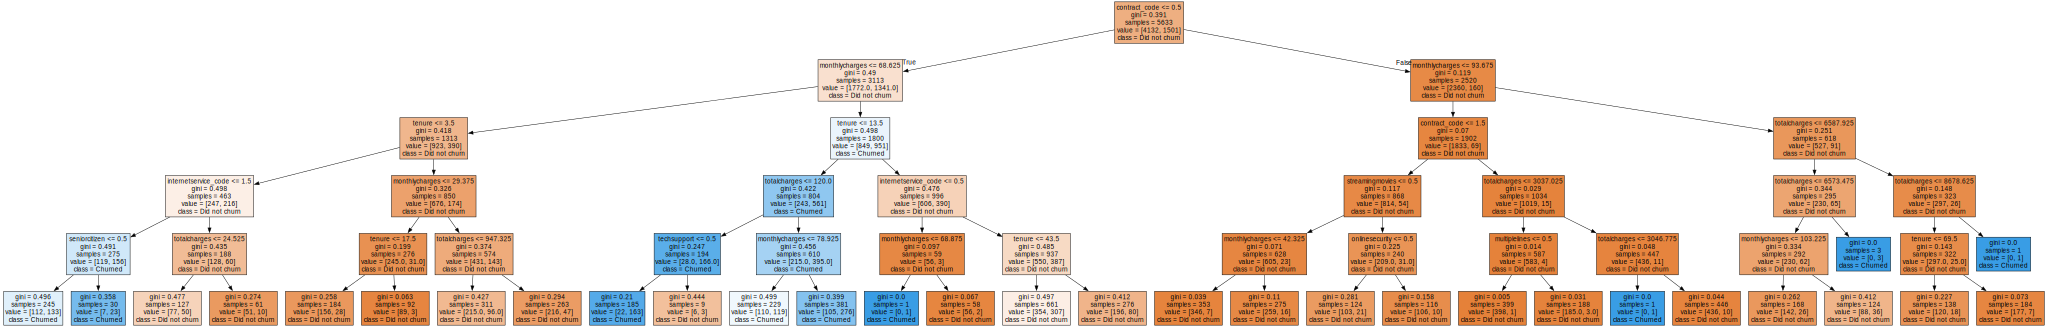

In [31]:
def plot_tree(tree, features, labels, filename=None):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled=True))
    display(SVG(graph.pipe(format='svg')))
    
    if filename:
        graph.render(filename, format='png', cleanup=True)

plot_tree(depth_decision3, x_train.columns, ['Did not churn', 'Churned'], 'depth_decision3')

In [32]:
test_decision_tree3 = accuracy_score(y_test, y_test_pred_decision_tree3)
test_decision_tree3

0.7716312056737589

Random Forest model



three ways with the 3 different depths above

First depth - 6 max depth

In [33]:
from sklearn.ensemble import RandomForestClassifier 

churn_forest1 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1) 
churn_forest1.fit(x_train, y_train)

y_test_pred_RandomForest1 = churn_forest1.predict(x_test)

churn_forest_output1 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest1})

In [34]:
feature_importances1 = churn_forest1.feature_importances_ 
features1 = x_train.columns
stats1 = pd.DataFrame({'feature':features1, 'importance':feature_importances1})
stats1.sort_values('importance', ascending=False) 

,feature,importance
16,contract_code,0.256442
4,tenure,0.228255
14,monthlycharges,0.128406
15,totalcharges,0.093439
17,internetservice_code,0.089953
18,paymentmethod_code,0.060343
13,paperlessbilling,0.023139
7,onlinesecurity,0.020521
10,techsupport,0.020329
1,seniorcitizen,0.015933


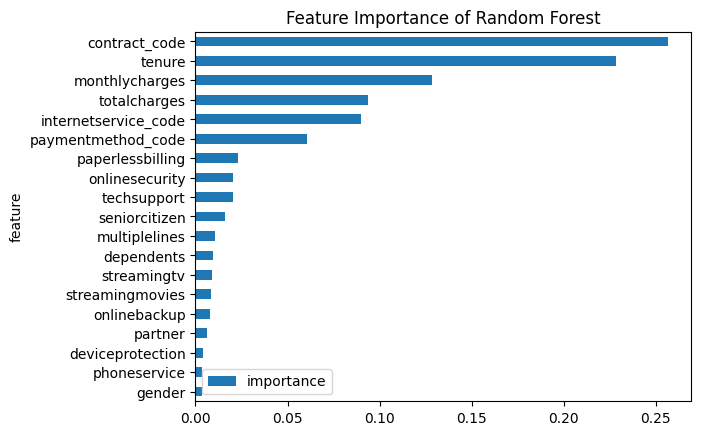

In [35]:
stats_sort1 = stats1.sort_values('importance', ascending=True)
stats_sort1.plot(y='importance', x='feature', kind='barh')            
plt.title('Feature Importance of Random Forest');

In [36]:
test_acc_churn_forest1 = accuracy_score(y_test, y_test_pred_RandomForest1)
test_acc_churn_forest1

0.7929078014184398

Second depth - 3 max depth

In [37]:
churn_forest2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1) 
churn_forest2.fit(x_train, y_train)

y_test_pred_RandomForest2 = churn_forest1.predict(x_test)

churn_forest_output2 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest2})

In [38]:
feature_importances2 = churn_forest2.feature_importances_ 
features2 = x_train.columns
stats2 = pd.DataFrame({'feature':features2, 'importance':feature_importances2})
stats2.sort_values('importance', ascending=False)

,feature,importance
16,contract_code,0.345510
4,tenure,0.215815
14,monthlycharges,0.114166
17,internetservice_code,0.078527
15,totalcharges,0.072868
18,paymentmethod_code,0.068186
13,paperlessbilling,0.023478
10,techsupport,0.023173
1,seniorcitizen,0.014064
7,onlinesecurity,0.010109


Text(0.5, 1.0, 'Feature Importance of Random Forest2')

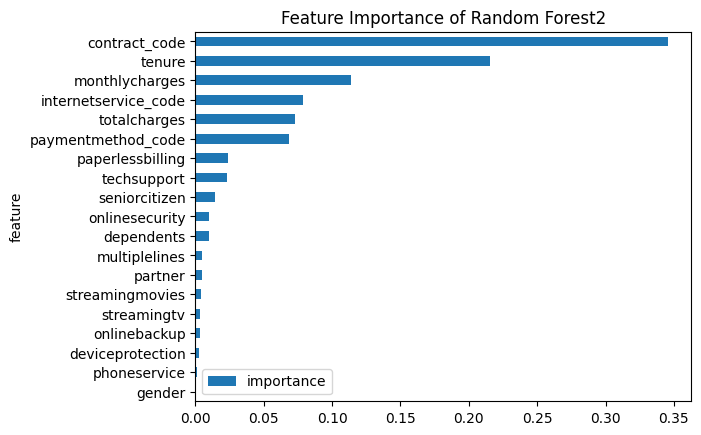

In [39]:
stats_sort2 = stats2.sort_values('importance', ascending=True)
stats_sort2.plot(y='importance', x='feature', kind='barh')            
plt.title('Feature Importance of Random Forest2')

In [40]:
test_acc_churn_forest2 = accuracy_score(y_test, y_test_pred_RandomForest2)
test_acc_churn_forest2

0.7929078014184398

Third depth - 5 max depth

In [41]:
churn_forest3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1) 
churn_forest3.fit(x_train, y_train)

y_test_pred_RandomForest3 = churn_forest3.predict(x_test)

churn_forest_output3 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest3})

In [42]:
feature_importances3 = churn_forest3.feature_importances_ 
features3 = x_train.columns
stats3 = pd.DataFrame({'feature':features3, 'importance':feature_importances3})
stats3.sort_values('importance', ascending=False) 

,feature,importance
16,contract_code,0.279315
4,tenure,0.219427
14,monthlycharges,0.126072
17,internetservice_code,0.100972
15,totalcharges,0.081718
18,paymentmethod_code,0.063504
10,techsupport,0.026660
13,paperlessbilling,0.023805
7,onlinesecurity,0.020224
1,seniorcitizen,0.013299


Text(0.5, 1.0, 'Feature Importance of Random Forest3')

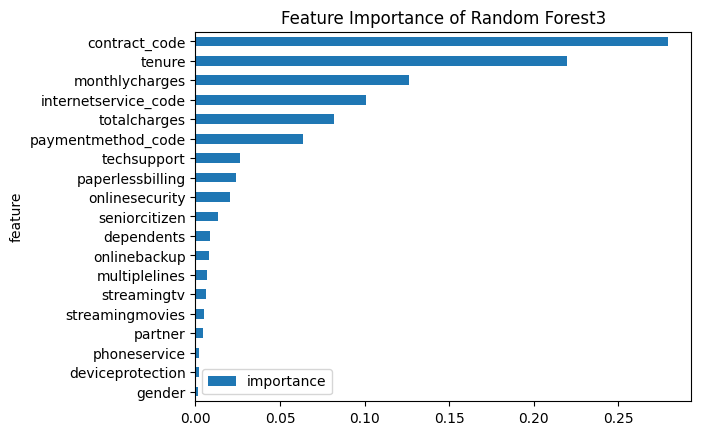

In [43]:
stats_sort3 = stats3.sort_values('importance', ascending=True)
stats_sort3.plot(y='importance', x='feature', kind='barh')            
plt.title('Feature Importance of Random Forest3')

In [44]:
test_acc_churn_forest3 = accuracy_score(y_test, y_test_pred_RandomForest3)
test_acc_churn_forest3

0.7929078014184398

KNN - K Nearest Neighbors

In [45]:
print(x_train.isnull().any(axis=1).sum())

0


In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

x_train

array([[1., 1., 0., ..., 0., 0., 2.],
       [1., 0., 1., ..., 2., 2., 0.],
       [0., 0., 1., ..., 1., 0., 3.],
       ...,
       [0., 0., 1., ..., 2., 2., 3.],
       [0., 1., 0., ..., 0., 1., 2.],
       [1., 0., 0., ..., 0., 2., 1.]])

In [47]:
from sklearn.neighbors import KNeighborsClassifier 

best_neighbors = []
best_accuracies = []

results = pd.DataFrame(columns=['n_neighbors', 'Accuracy'])

for neighbors in range(1, 51):
    churn_knn = KNeighborsClassifier(n_neighbors=neighbors)
    churn_knn.fit(x_train, y_train)
    
    y_test_pred_knn = churn_knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_test_pred_knn)

    new_row = pd.DataFrame({'n_neighbors': [neighbors], 'Accuracy': [accuracy]})
    results = pd.concat([results, new_row], ignore_index=True)
    
    if len(best_neighbors) < 3 or accuracy > min(best_accuracies):
        if len(best_neighbors) == 3:
            min_index = best_accuracies.index(min(best_accuracies))
            best_neighbors.pop(min_index)
            best_accuracies.pop(min_index)
        best_neighbors.append(neighbors)
        best_accuracies.append(accuracy)

best_neighbors = [x for _, x in sorted(zip(best_accuracies, best_neighbors), reverse=True)]
best_accuracies = sorted(best_accuracies, reverse=True)

for i, (neighbors, accuracy) in enumerate(zip(best_neighbors, best_accuracies)):
    print(f"Top {i+1} n_neighbors is {neighbors} with an accuracy of {accuracy:.4f}")

C:\Users\emmag\AppData\Local\Temp\ipykernel_38164\150950639.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


Top 1 n_neighbors is 23 with an accuracy of 0.7823
Top 2 n_neighbors is 25 with an accuracy of 0.7816
Top 3 n_neighbors is 21 with an accuracy of 0.7816


Option 1 - 23 neighboors

In [48]:
churn_knn1 = KNeighborsClassifier(n_neighbors=23)
churn_knn1.fit(x_train, y_train) 

y_test_pred_Knn1 = churn_knn1.predict(x_test)

churn_knn_output1 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_Knn1})

In [49]:
churn_knn_output1

,customerid,actually_churned,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
4446,6161.0,1.0,1.0
2234,4500.0,0.0,0.0
5454,2506.0,1.0,1.0
1278,4730.0,0.0,0.0
578,6522.0,0.0,0.0


      customerid  actually_churned  churned_predicted_by_model
2200      6296.0               0.0                         0.0
4627      3680.0               0.0                         0.0
3225      4931.0               0.0                         0.0
2828      8559.0               0.0                         0.0
3768      3537.0               0.0                         0.0


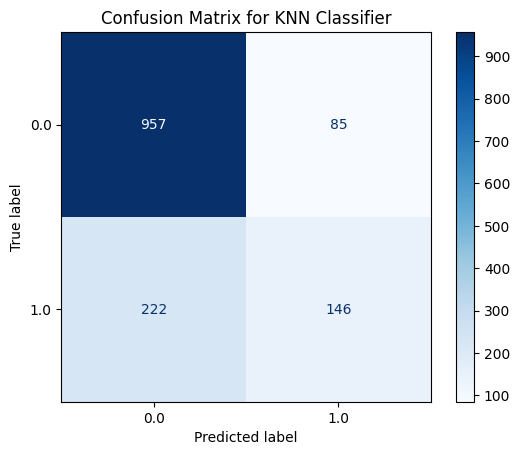

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

churn_knn1 = KNeighborsClassifier(n_neighbors=23)
churn_knn1.fit(x_train, y_train)

y_test_pred_Knn1 = churn_knn1.predict(x_test)

churn_knn_output1 = pd.DataFrame({
    'customerid': customer_test,
    'actually_churned': y_test,
    'churned_predicted_by_model': y_test_pred_Knn1
})

print(churn_knn_output1.head())

cm = confusion_matrix(y_test, y_test_pred_Knn1, labels=churn_knn1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=churn_knn1.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Classifier')


plt.savefig('knn_confusion_matrix.png', dpi=1200)
plt.show()

In [51]:
test_acc_churn_knn_output1 = accuracy_score(y_test, y_test_pred_Knn1)
test_acc_churn_knn_output1

0.7822695035460993

Option 2 - 25 neighboors

In [52]:
churn_knn2 = KNeighborsClassifier(n_neighbors=25)
churn_knn2.fit(x_train, y_train) 

y_test_pred_Knn2 = churn_knn2.predict(x_test)

churn_knn_output2 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_Knn2})

In [53]:
test_acc_churn_knn_output2 = accuracy_score(y_test, y_test_pred_Knn2)
test_acc_churn_knn_output2

0.7815602836879433

Option 3 - 21 neighboors

In [54]:
churn_knn3 = KNeighborsClassifier(n_neighbors=21)
churn_knn3.fit(x_train, y_train) 

y_test_pred_Knn3 = churn_knn3.predict(x_test)

churn_knn_output3 = pd.DataFrame({'customerid': customer_test, 'actually_churned':y_test, 'churned_predicted_by_model': y_test_pred_Knn3})

In [55]:
test_acc_churn_knn_output3 = accuracy_score(y_test, y_test_pred_Knn3)
test_acc_churn_knn_output3

0.7815602836879433

For part B of the project - exporting the ML algorithm - knn with 23 neighboors

In [56]:
import pickle

filename = 'churn_knn_model.sav'
pickle.dump(churn_knn1, open(filename, 'wb'))

In [57]:
churn_knn_output1.to_csv('churn_pred_partA.csv', index=False)

print("The merged DataFrame has been saved to 'churn_pred_partA.csv'.")

The merged DataFrame has been saved to 'churn_pred_partA.csv'.


For Part D, check the indexes of contract, internetservice and paymentmethod

In [58]:

contract_mapping = {index: label for index, label in enumerate(label_encoder_contract.classes_)}

internetservice_mapping = {index: label for index, label in enumerate(label_encoder_internetservice.classes_)}

paymentmethod_mapping = {index: label for index, label in enumerate(label_encoder_paymentmethod.classes_)}

print("Contract Mapping:")
for index, label in contract_mapping.items():
    print(f"{label}: {index}")

print("\nInternet Service Mapping:")
for index, label in internetservice_mapping.items():
    print(f"{label}: {index}")

print("\nPayment Method Mapping:")
for index, label in paymentmethod_mapping.items():
    print(f"{label}: {index}")




Contract Mapping:
Month-to-month: 0
One year: 1
Two year: 2

Internet Service Mapping:
DSL: 0
Fiber optic: 1
No: 2

Payment Method Mapping:
Bank transfer (automatic): 0
Credit card (automatic): 1
Electronic check: 2
Mailed check: 3
